<a href="https://colab.research.google.com/github/Krahjotdaan/MachineLearning/blob/main/DecisionTree_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Решающие деревья библиотеки sklearn

In [ ]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

from sklearn.datasets import make_moons

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

## ПРАКТИКА 1
### Немного нового полезного из работы с матрицами:
- запустите ячейки с примерами функций
- посмотрите на получаемый результат, проинтерпретируйте его

In [ ]:
# ПРИМЕР с meshgrid
a = [1, 2, 3, 4, 5]
b = [0, 5, 10, 15, 20, 25, 30]
AB = np.meshgrid(a, b)
AB

[array([[1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5]]),
 array([[ 0,  0,  0,  0,  0],
        [ 5,  5,  5,  5,  5],
        [10, 10, 10, 10, 10],
        [15, 15, 15, 15, 15],
        [20, 20, 20, 20, 20],
        [25, 25, 25, 25, 25],
        [30, 30, 30, 30, 30]])]

In [ ]:
# ПРИМЕР ravel
a = np.array([[0, 1, 2],
               [3, 4, 5],
               [6, 7, 8]])
np.ravel(a)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
# ПРИМЕР np.c_
a = np.arange(1, 5, 1)
b = np.arange(10, 41, 10)
d = np.arange(100, 401, 100)
np.c_[a, b, d]

array([[  1,  10, 100],
       [  2,  20, 200],
       [  3,  30, 300],
       [  4,  40, 400]])

In [ ]:
# ОБЪЕДИНИМ эти операции и получим СПИСОК ВСЕВОЗМОЖНЫХ ПАР
a = [1, 2, 3, 4]
b = [0, 10, 20, 30]
AB = np.meshgrid(a, b)
np.c_[AB[0].ravel(), AB[1].ravel()]

array([[ 1,  0],
       [ 2,  0],
       [ 3,  0],
       [ 4,  0],
       [ 1, 10],
       [ 2, 10],
       [ 3, 10],
       [ 4, 10],
       [ 1, 20],
       [ 2, 20],
       [ 3, 20],
       [ 4, 20],
       [ 1, 30],
       [ 2, 30],
       [ 3, 30],
       [ 4, 30]])

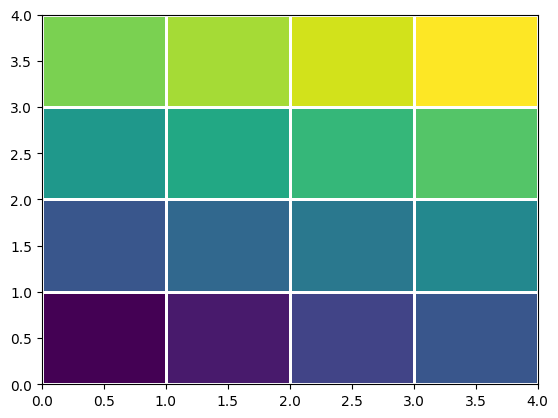

In [ ]:
# еще один способ ВИЗУАЛИЗАЦИИ
c = [[ 0, 1, 3, 4],
     [ 4, 5, 6, 7],
     [ 8, 9, 10, 11],
     [12, 13, 14, 15]]

plt.pcolormesh(c, edgecolor = 'w', linewidth = 1)
plt.show()

## ПРАКТИКА 2
### Теперь обучим решающее дерево на двумерных данных
- обучите деревья с энтропийным критерием и глубины 1, 2, 9
- визуализируйте границы принятия решений, полученные с помощью каждого дерева
- визуализируйте построенные деревья

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.35, random_state=42)

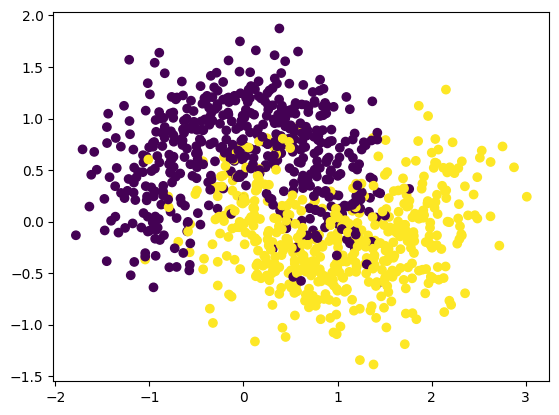

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y);

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=9).fit(X, y)

In [ ]:
eps = X.std() / 2
x0_min, x0_max = X[:, 0].min() - eps, X[:, 0].max() + eps
x1_min, x1_max = X[:, 1].min() - eps, X[:, 1].max() + eps

xx0 = np.linspace(x0_min, x0_max, 1000)
xx1 = np.linspace(x1_min, x1_max, 1000)

X0, X1 = np.meshgrid(xx0, xx1)
X_grid = np.c_[X0.ravel(), X1.ravel()]
X_grid

array([[-2.17863615, -1.78258734],
       [-2.17304257, -1.78258734],
       [-2.16744899, -1.78258734],
       ...,
       [ 3.39816627,  2.27032027],
       [ 3.40375985,  2.27032027],
       [ 3.40935344,  2.27032027]])

In [ ]:
y_pred = clf.predict(X_grid)
y_pred.reshape(X0.shape)

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

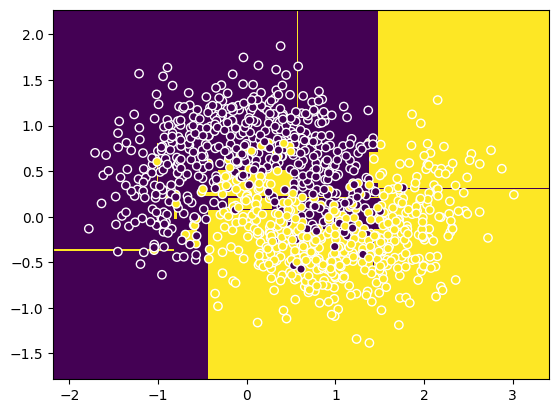

In [ ]:
plt.pcolormesh(X0, X1, y_pred.reshape(X0.shape))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='w');
plt.show()

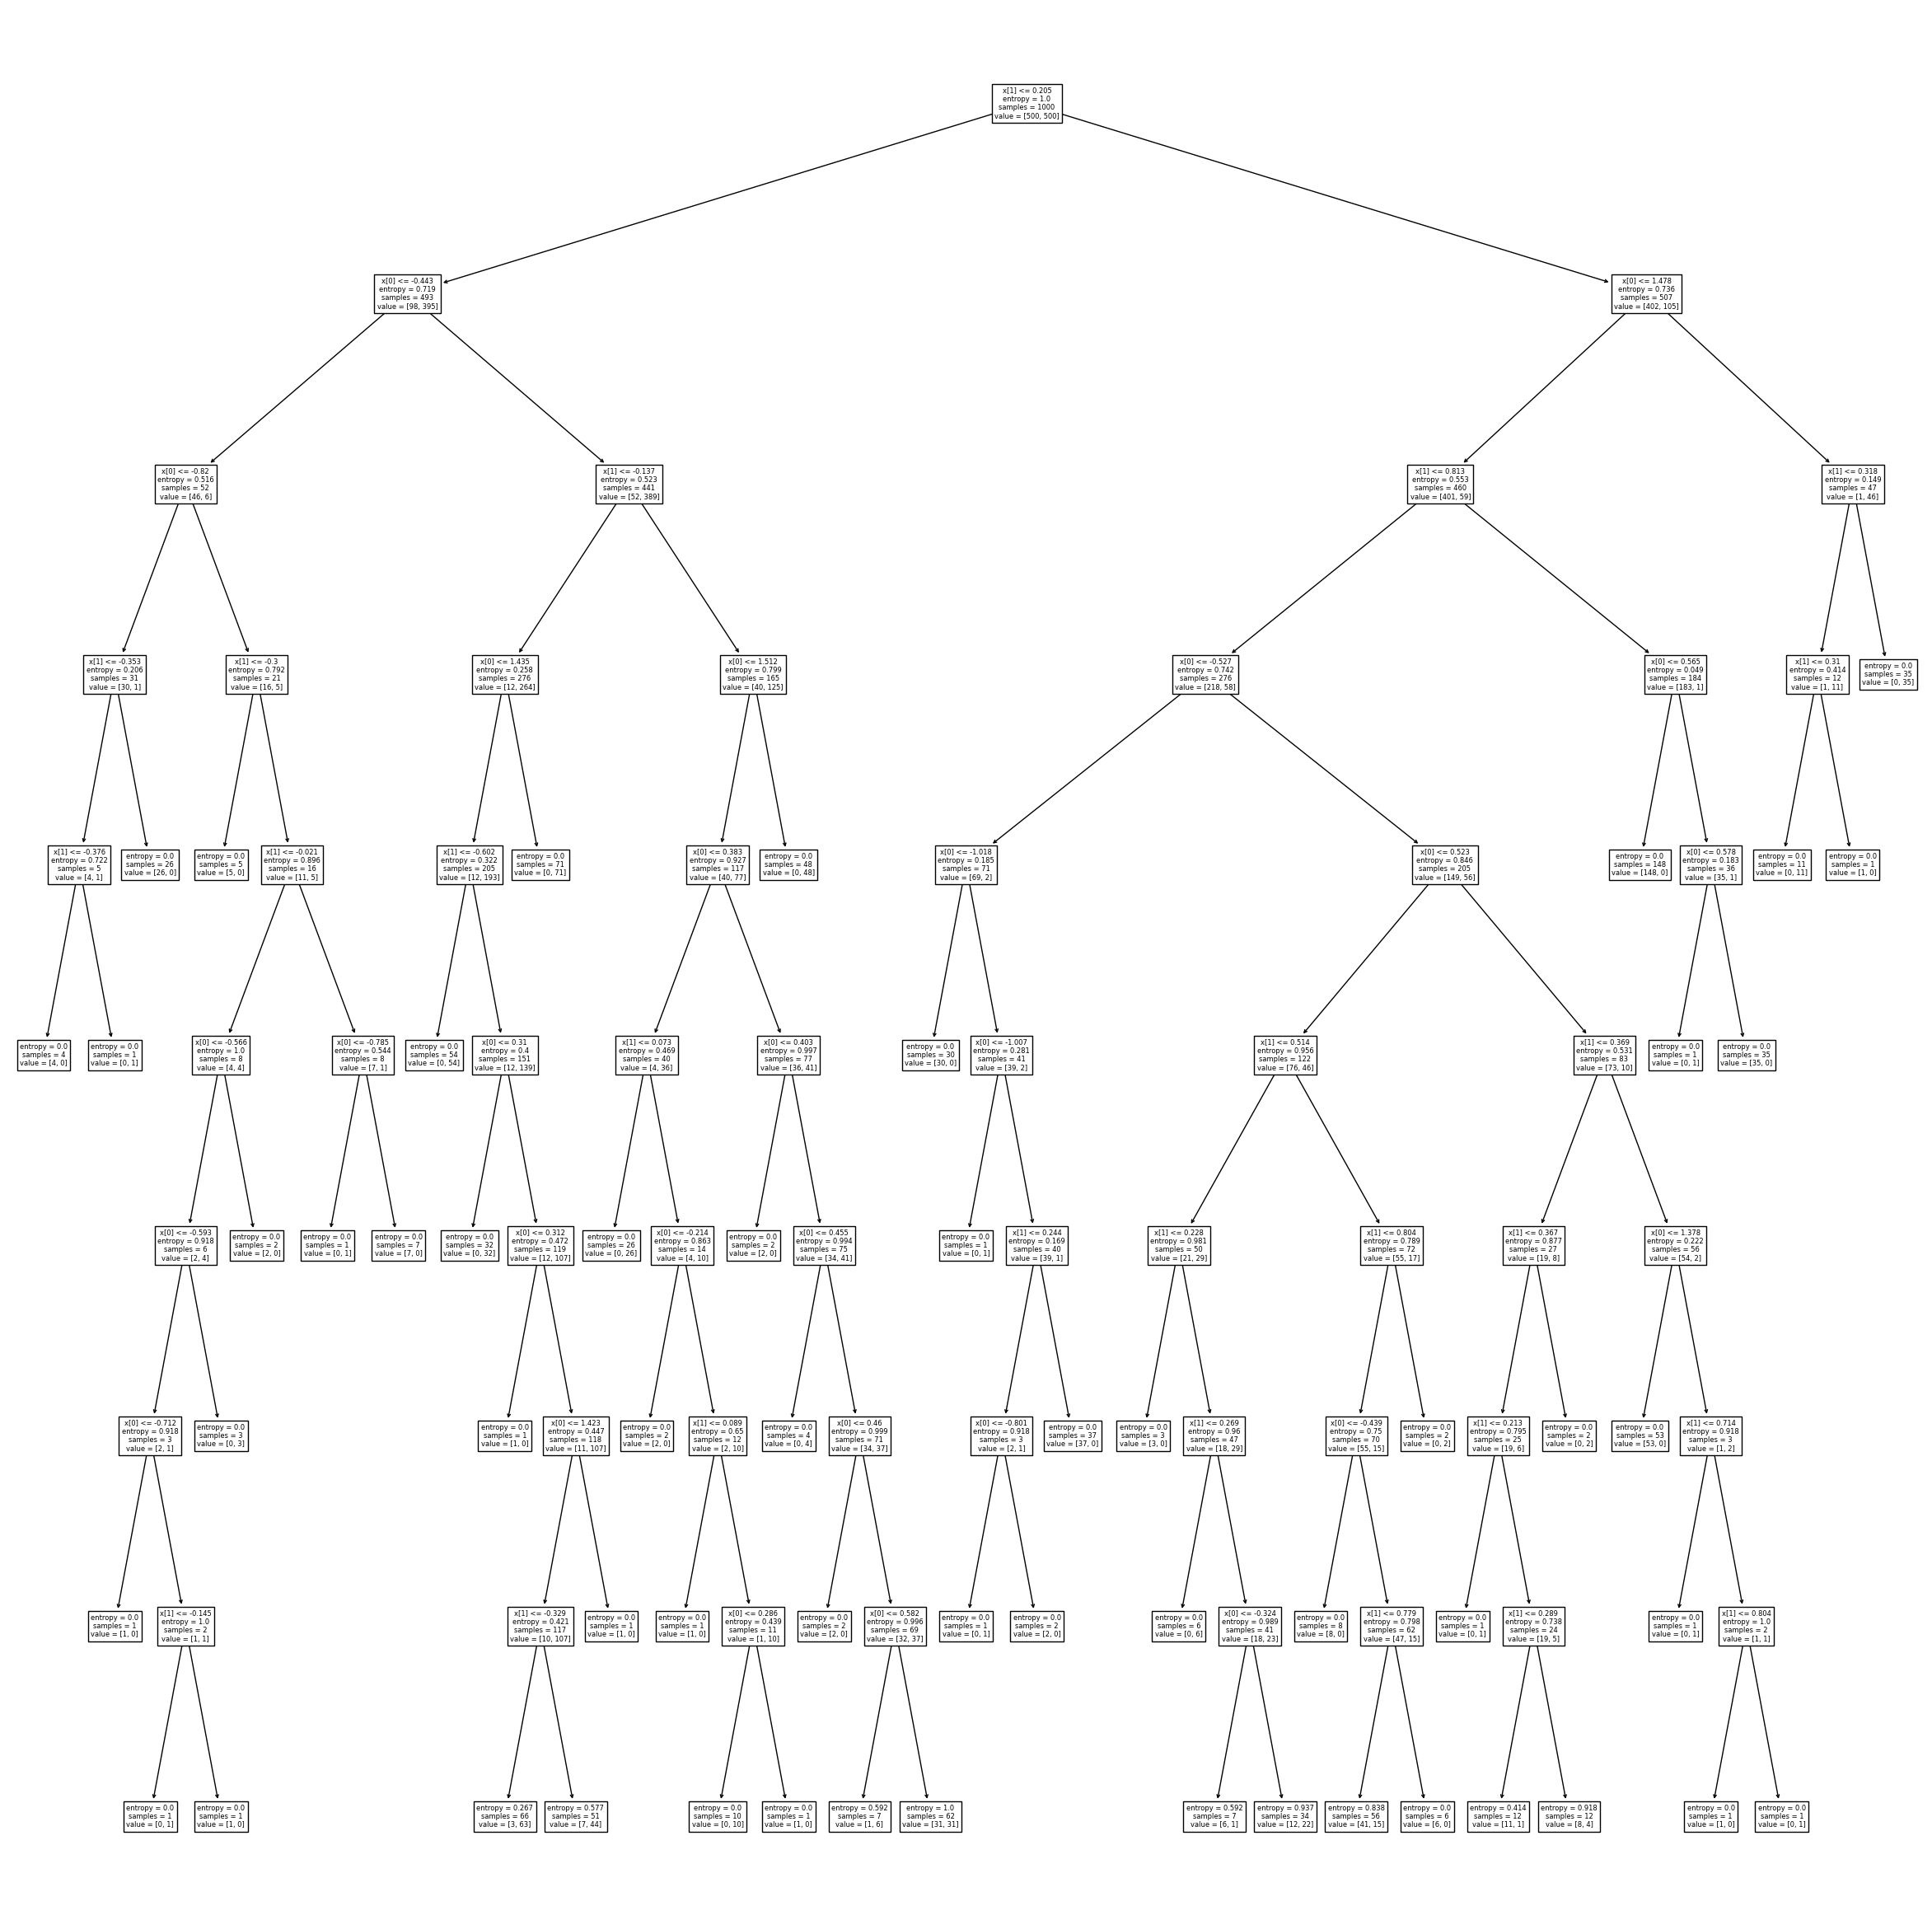

In [ ]:
from sklearn import tree
fig = plt.figure(figsize = (30, 30))
tree.plot_tree(clf);

##  ПРАКТИКА 3
### РЕШАЮЩИЕ ДЕРЕВЬЯ и ПРОГНОЗ оттока абонентов
### ШАГ 1

Будем работать с уже известным нам датасетом задачи прогноза оттока абонентов сотового оператора.

- загрузите данные
- Исследуйте набор: постройте круговую диаграмму для целевого признака 'Customer Status', посмотрите информацию о наборе данных с помощью df.info()
- сформируйте матрицу признаков и целевой вектор(Удалите следующие признаки: 'Customer ID', 'City', 'Zip Code', 'Churn Category', 'Churn Reason', 'Customer Status').
- Заполните пропущенные значения нулями
- преобразуйте признаки со строковыми значениями(метод горячего кодирования)
- обучите дерево с параметрами по-умолчанию на кросс-валидации
- выведите метрики F1 и accuracy

In [ ]:
df = pd.read_csv('telecom_churn.csv')
df = df[df['Customer Status'] != 'Joined']
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


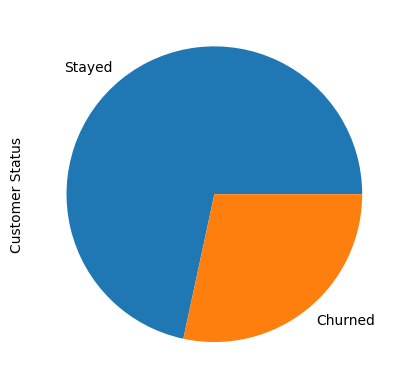

In [ ]:
df['Customer Status'].value_counts().plot(kind='pie');

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6589 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6589 non-null   object 
 1   Gender                             6589 non-null   object 
 2   Age                                6589 non-null   int64  
 3   Married                            6589 non-null   object 
 4   Number of Dependents               6589 non-null   int64  
 5   City                               6589 non-null   object 
 6   Zip Code                           6589 non-null   int64  
 7   Latitude                           6589 non-null   float64
 8   Longitude                          6589 non-null   float64
 9   Number of Referrals                6589 non-null   int64  
 10  Tenure in Months                   6589 non-null   int64  
 11  Offer                              6589 non-null   objec

In [ ]:
X_ = df.drop(columns=['Customer ID', 'City', 'Zip Code', 'Churn Category', 'Churn Reason', 'Customer Status'])
X = pd.get_dummies(X_).fillna(0)
y = df['Customer Status']

In [ ]:
clf = DecisionTreeClassifier()
print(cross_val_score(clf, X, y, scoring='accuracy').mean())
print(cross_val_score(clf, X, y, scoring='f1_macro').mean())

0.8221288554135657
0.781967949279635


In [ ]:
d = {'Stayed': 0, 'Churned': 1}
y = y.replace(d)

### ШАГ 2

Переберите с помощью GridSearchCV параметры для дерева.

Найдите максимальный F1 и параметры.

Вам пригодятся параметры:
- max_depth - максимальная глубина дерева
- min_samples_split - минимальное количество объектов,  необходимое для разделения внутреннего узла
- min_samples_leaf - минимальное количество объектов, которое должно быть в листовой вершине

In [ ]:
params = {
    'max_depth': [None, 2, 4, 6, 8],
    'min_samples_split': np.arange(2, 9),
    'min_samples_leaf': np.arange(2, 9)
}

tree1 = DecisionTreeClassifier(criterion='entropy')

gs = GridSearchCV(tree1, params, verbose=1, scoring='f1_macro')
gs.fit(X, y)

Fitting 5 folds for each of 245 candidates, totalling 1225 fits


GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [None, 2, 4, 6, 8],
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8])},
             scoring='f1_macro', verbose=1)

### ШАГ 3.

Отмасштабируйте выборку и сравните результаты с предыдущим пунктом.

In [ ]:
X_ = MinMaxScaler().fit_transform(X)

In [ ]:
tree2 = DecisionTreeClassifier(criterion='entropy')

gs1 = GridSearchCV(tree2, params, verbose=1, scoring='f1_macro')
gs1.fit(X, y)

Fitting 5 folds for each of 245 candidates, totalling 1225 fits


GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [None, 2, 4, 6, 8],
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8])},
             scoring='f1_macro', verbose=1)

In [ ]:
gs1.best_score_, gs1.best_params_

(0.8153017529358271,
 {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 5})

In [ ]:
params1 = {
    'C': np.arange(0.5, 10, 0.5),
}

lr1 = LogisticRegression()

gs2 = GridSearchCV(lr1, params1, verbose=1, scoring='f1_macro')
gs2.fit(X, y)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5,
       7. , 7.5, 8. , 8.5, 9. , 9.5])},
             scoring='f1_macro', verbose=1)

In [ ]:
gs2.best_score_, gs2.best_params_

(0.7646538613869702, {'C': 7.0})

### ШАГ 4.

Сравнить качество дерева и логистической регрессии.

Для обеих моделей возьмите лучшие параметры



In [ ]:
tr = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=8, min_samples_split=5)
lr = LogisticRegression(C=7)
tr.fit(X, y)
lr.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=7)

In [ ]:
print(cross_val_score(tr, X, y, scoring='accuracy').mean(), cross_val_score(tr, X, y, scoring='f1_macro').mean())
print(cross_val_score(lr, X, y, scoring='accuracy').mean(), cross_val_score(lr, X, y, scoring='f1_macro').mean())